In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from typing import List

In [64]:
house_df = pd.read_csv("clean_house_data.csv")
# df = house_df.loc[:, house_df.isnull().mean() < .8]
# df
house_df.columns

Index(['id', 'Zip', 'Price', 'Price of square meter', 'Building Cond. values',
       'Number of facades', 'Number of rooms', 'Living area', 'Furnished',
       'Kitchen values', 'Surface of the land', 'Primary energy consumption',
       'Energy_classes', 'Terrace', 'Terrace surface', 'Garden',
       'Garden surface', 'Open fire', 'Swimming pool'],
      dtype='object')

In [65]:
# Remove outliers
def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = house_df[col].mean()
        sd = house_df[col].std()
        
        house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
    return house_df

no_outliers_df = remove_outliers(house_df, ('Number of rooms', 'Living area', 'Surface of the land', 'Terrace surface','Garden surface'), 3)

Working on column: Number of rooms
Working on column: Living area
Working on column: Surface of the land
Working on column: Terrace surface
Working on column: Garden surface


In [66]:
X = no_outliers_df

y = no_outliers_df['Price']

In [67]:
X

,id,Zip,Price,Price of square meter,Building Cond. values,Number of facades,Number of rooms,Living area,Furnished,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,10597213,4000,380000,1759.26,4.0,4.0,5.0,216.0,0.0,1.0,2100.0,335.0,4,0,0.0,1,1800.0,1.0,0.0
1,10594958,4400,315000,1730.77,2.0,4.0,3.0,182.0,0.0,2.0,1580.0,480.0,3,0,0.0,1,1000.0,0.0,0.0
2,10595263,1420,750000,2737.23,4.0,4.0,3.0,274.0,0.0,3.0,1567.0,157.0,6,1,62.0,1,1428.0,1.0,0.0
3,10593759,4020,179000,1598.21,3.0,2.0,3.0,112.0,0.0,1.0,135.0,304.0,4,1,100.0,1,35.0,0.0,0.0
4,10593565,9600,209000,1583.33,3.0,2.0,3.0,132.0,0.0,3.0,180.0,252.0,5,1,20.0,1,80.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,10527237,6900,315000,1296.30,3.0,1.0,5.0,243.0,0.0,NaN,307.0,540.0,2,0,0.0,0,0.0,0.0,0.0
9413,10519578,2860,319000,1450.00,1.0,2.0,3.0,220.0,0.0,NaN,805.0,650.0,1,0,0.0,0,0.0,0.0,0.0
9415,10560674,8530,319000,2031.85,4.0,NaN,3.0,157.0,0.0,1.0,437.0,260.0,5,0,0.0,0,0.0,0.0,0.0
9418,10562843,9300,324000,2571.43,1.0,NaN,3.0,126.0,0.0,1.0,679.0,527.0,2,0,0.0,0,0.0,0.0,0.0


In [68]:
y

0       380000
1       315000
2       750000
3       179000
4       209000
         ...  
9410    315000
9413    319000
9415    319000
9418    324000
9419    325000
Name: Price, Length: 5177, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [70]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Now let’s evaluate the model by checking out its coefficients 
# and how we can interpret them.
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

coeff_df

-65757.12328065897


,Coefficient
Number of rooms,19785.321694
Living area,1893.246354
Surface of the land,40.596323
Terrace surface,1184.988860
Garden surface,-12.604078


In [ ]:

# Expected kind of output : 

# Avg. Area Income : 21.528
# Avg. Area House Age : 164883.28
# Avg. Area Number of Rooms : 122368.67
# Avg. Area Number of Bedrooms : 2233.80
# Area Population : 15.15

# What does coefficient of data says:

#     Holding all other features fixed, a 1 unit increase in Avg. Area Income 
#     is associated with an increase of $21.52 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area House Age 
#     is associated with an increase of $164883.28 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms 
#     is associated with an increase of $122368.67 .
#     Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms 
#     is associated with an increase of $2233.80 .
#     Holding all other features fixed, a 1 unit increase in Area Population 
#     is associated with an increase of $15.15 .


In [ ]:
predictions = lm.predict(X_test)  

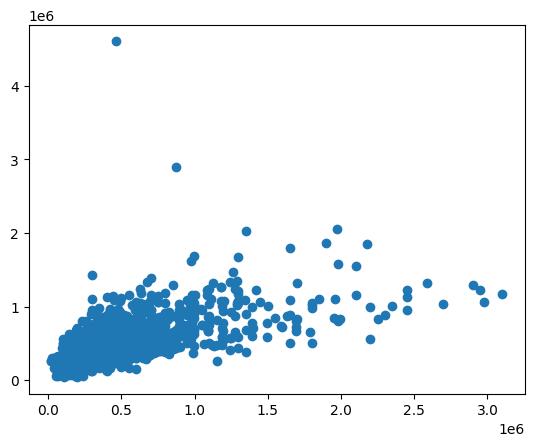

In [ ]:
plt.scatter(y_test,predictions)
# Good prediction would appear as a line.

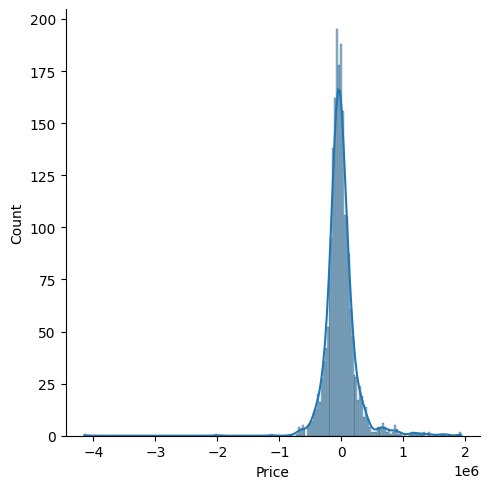

In [ ]:
sns.displot((y_test-predictions), kde=True)
# If the data is displayed in a bell shape, we did well

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 159121.84461400576


In [ ]:
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 

MSE: 72546371656.24063


In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

RMSE: 269344.33659581677
